# Set-up MLFlow

In [1]:
!pip install mlflow --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 672.8/672.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.7 MB/s eta 0:00:00


In [2]:
import mlflow

## Connect storage

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!mkdir mlflow_results

In [4]:
# To use MLFlow on Colab, we need to connect storage. We will use Google Drive

# Define the MLflow storage path in Google Drive
mlflow_storage_path = "/content/drive/My Drive/mlflow_results"

# Set MLflow to log to the Google Drive directory
mlflow.set_tracking_uri(f"file:{mlflow_storage_path}")

In [39]:
# Set up experiment name. Keep the experiment name the same across all models for easy comparison
mlflow.set_experiment("Demand Forecast New Task")

<Experiment: artifact_location='file:///content/drive/My Drive/mlflow_results/254326668772453450', creation_time=1741710448496, experiment_id='254326668772453450', last_update_time=1741710448496, lifecycle_stage='active', name='Demand Forecast New Task', tags={}>

## Start MLFlow UI

In [6]:
!pip install pyngrok --quiet

In [40]:
from pyngrok import ngrok, conf
import getpass
import subprocess

In [41]:
subprocess.Popen(["mlflow", "ui", "--backend-store-uri", mlflow_storage_path])

<Popen: returncode: None args: ['mlflow', 'ui', '--backend-store-uri', '/con...>

In [42]:
print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/get-started/your-authtoken")
conf.get_default().auth_token = getpass.getpass()
port=5000
public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel \"{public_url}\" ')

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/get-started/your-authtoken
··········
 * ngrok tunnel "https://c9d5-34-147-83-142.ngrok-free.app" 


# Import all libraries we will need for the modeling and evaluation

In [11]:
!pip install darts --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.0/981.0 kB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.1 MB/s eta 0:00:00

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
import mlflow.pyfunc
from sklearn.metrics import mean_absolute_error, mean_squared_error

from darts import TimeSeries
from darts.models import ARIMA
from darts.metrics import mae, mape, rmse

import xgboost as xgb

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Read the files with pandas

In [44]:
# Load the CSV files into pandas DataFrames
df_stores = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/stores.csv')
df_items = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/items.csv')
df_transactions = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/transactions.csv')
df_oil = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/oil.csv')
df_holidays_events = pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/holidays_events.csv')

## For the quick experimenting, we will select a few store-product pairs

In [45]:
# Get the list of store IDs for the state 'Guayas'
store_ids = df_stores[df_stores['state'] == 'Guayas']['store_nbr'].unique()
#Select the same items as for "Classical methods":
item_ids = [106716, 1158720]
#Select data before April'14
max_date = '2014-04-01'

# Initialize an empty list to hold filtered chunks
filtered_chunks = []

# Define the chunk size (number of rows per chunk)
chunk_size = 10 ** 6  # Adjust based on your system's memory capacity

# Read the CSV file in chunks
for chunk in pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/train.csv', chunksize=chunk_size):
    # Filter the chunk for the desired store IDs
    chunk_filtered = chunk[(chunk['store_nbr'].isin(store_ids)) & (chunk['item_nbr'].isin(item_ids)) & (chunk['date']<max_date)]
    # Append the filtered chunk to the list
    filtered_chunks.append(chunk_filtered)
    # Optional: Delete the chunk to free up memory
    del chunk

# Concatenate all filtered chunks into a single DataFrame
df_filtered = pd.concat(filtered_chunks, ignore_index=True)

# Clean up to free memory
del filtered_chunks

# Group by date and aggregate sales
df_filtered = df_filtered.groupby(['store_nbr','item_nbr','date']).sum()['unit_sales'].reset_index()

<ipython-input-45-7640102a9c15>:15: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv('/content/drive/MyDrive/retail_kaggle_data/train.csv', chunksize=chunk_size):


In [46]:
df_filtered.shape


(6659, 4)

# Prepare data

In [47]:
df_filtered.shape


(6659, 4)

## Fill out missing dates with 0 sales

In [48]:
import pandas as pd

# Convert 'date' column to datetime format
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Get the minimum and maximum dates in the dataset to create a full date range
min_date = df_filtered['date'].min()
max_date = df_filtered['date'].max()
print(min_date.date(), max_date.date())

# Create a full date range covering all days between the min and max dates
full_date_range = pd.date_range(start=min_date, end=max_date, freq='D')

# Create an empty DataFrame to store the final result
df_filled = pd.DataFrame()

# Iterate through each store and item combination
for (store, item), group in df_filtered.groupby(['store_nbr', 'item_nbr']):
    # Set 'date' as index and sort by date
    group.set_index('date', inplace=True)
    group = group.sort_index()

    # Reindex to fill missing dates with 0 sales
    group = group.reindex(full_date_range, fill_value=0)

    # Keep track of the store and item number for each row
    group['store_nbr'] = store
    group['item_nbr'] = item

    # Ensure that missing sales values are filled with 0
    group['unit_sales'] = group['unit_sales'].fillna(0)

    # Append the group to the final DataFrame
    df_filled = pd.concat([df_filled, group])

# Reset the index to get 'date' back as a column
df_filled.reset_index(inplace=True)
df_filled.rename(columns={'index': 'date'}, inplace=True)

2013-01-02 2014-03-31


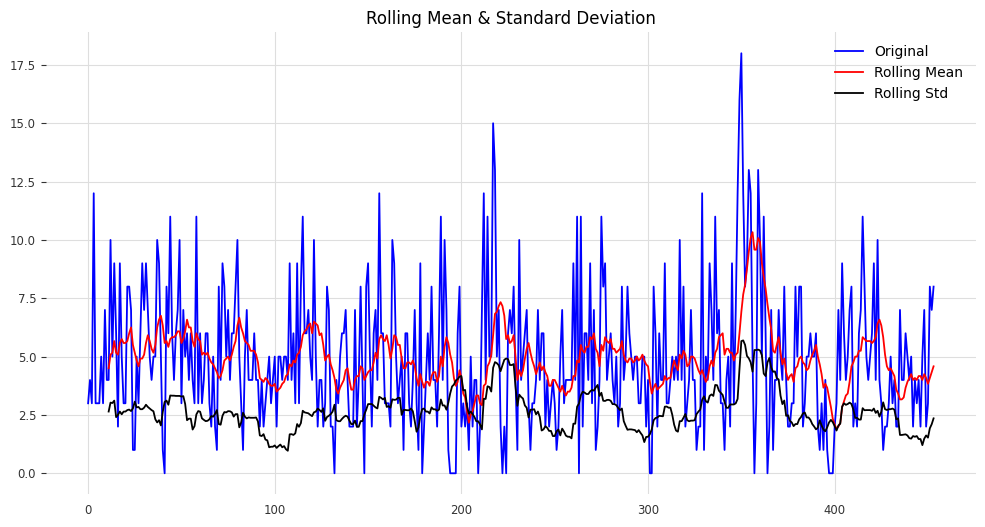

Results of Augmented Dickey-Fuller Test:
ADF Statistic                 -1.187706e+01
p-value                        6.304557e-22
# Lags Used                    1.000000e+00
Number of Observations Used    4.520000e+02
Critical Value (1%)           -3.444900e+00
Critical Value (5%)           -2.867956e+00
Critical Value (10%)          -2.570187e+00
dtype: float64


In [49]:
#Perform ADF test
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd

def check_stationarity(timeseries, column_name="unit_sales"):
    """
    Perform ADF test and plot rolling statistics for stationarity check.
    """
    # Rolling statistics
    rolling_mean = timeseries[column_name].rolling(window=12).mean()
    rolling_std = timeseries[column_name].rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries[column_name], label='Original', color='blue')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std', color='black')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

    # ADF test
    print("Results of Augmented Dickey-Fuller Test:")
    adf_test = adfuller(timeseries[column_name], autolag='AIC')
    adf_results = pd.Series(adf_test[:4], index=['ADF Statistic', 'p-value', '# Lags Used', 'Number of Observations Used'])

    for key, value in adf_test[4].items():
        adf_results[f'Critical Value ({key})'] = value

    print(adf_results)

# Example usage:
for (item_nbr, store_nbr), group in df_filled.groupby(['item_nbr', 'store_nbr']):
    group = group.groupby(['date']).sum()['unit_sales'].reset_index()
    check_stationarity(group, column_name="unit_sales")
    break  # Check only one time series for visualization


p-value < 0.05, series is stationary

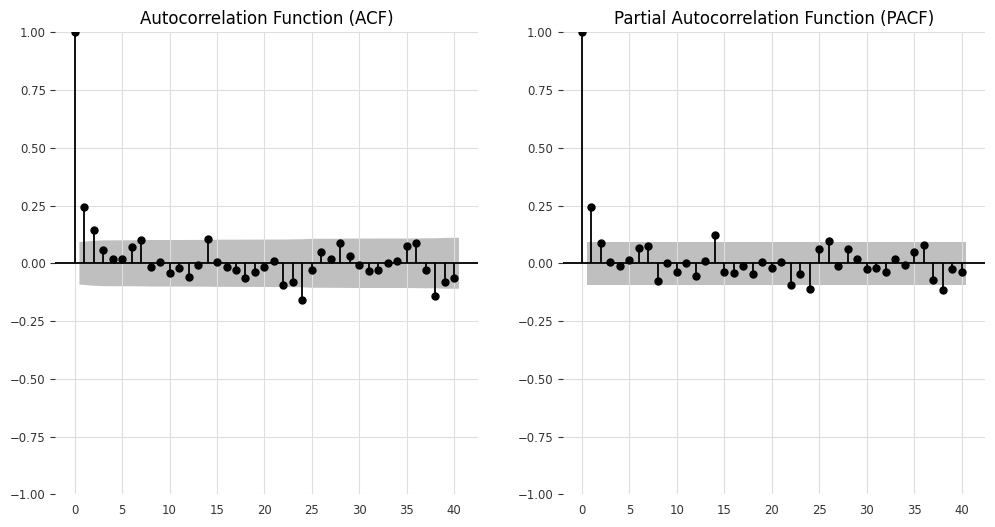

In [50]:
#Plot ACF and PACF to determine p and q for ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_pacf(timeseries, column_name="unit_sales", lags=40):
    """
    Plot ACF and PACF to determine p and q for ARIMA.
    """
    plt.figure(figsize=(12, 6))

    plt.subplot(121)
    plot_acf(timeseries[column_name], lags=lags, ax=plt.gca())
    plt.title("Autocorrelation Function (ACF)")

    plt.subplot(122)
    plot_pacf(timeseries[column_name], lags=lags, ax=plt.gca())
    plt.title("Partial Autocorrelation Function (PACF)")

    plt.show()

# Example usage:
for (item_nbr, store_nbr), group in df_filled.groupby(['item_nbr', 'store_nbr']):
    group = group.groupby(['date']).sum()['unit_sales'].reset_index()
    plot_acf_pacf(group, column_name="unit_sales")
    break  # Check only one time series for visualization


The **Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)** plots provide insights into the structure of the time series and help determine the appropriate parameters for ARIMA modeling.

### **Analysis of the ACF and PACF Plots:**
1. **ACF Plot (Left) Interpretation:**
   - The first lag shows a strong correlation (expected).
   - All other lags remain within the confidence bounds (gray area), meaning there is **no significant autocorrelation**.
   - This suggests that the time series behaves like **white noise** or is already **stationary**.

2. **PACF Plot (Right) Interpretation:**
   - Similar to the ACF plot, there is **only one significant spike at lag 1**.
   - The rest of the lags are within the confidence bounds.
   - This suggests a possible **AR(1) process**, meaning an **ARIMA(p=1, d=0, q=0)** model could be a good starting point.

### **Implications for ARIMA Model Selection:**
- Since **ACF cuts off immediately** and **PACF also shows no significant lags after the first**, this suggests an **AR(1) process**.
- The **differencing term (d)** can be **0**, as ADF and ACF indicate stationarity.
- The **MA component (q)** appears to be **0**, as there is no strong structure in ACF.
  
### **Suggested ARIMA Model:**
- **ARIMA(1,0,0)** (Pure autoregressive model with no differencing and no moving average component).

#### **Next Steps:**
1. **Validate Stationarity with the ADF Test** (to confirm `d=0`).
2. **Test ARIMA(1,0,0) and compare it with Auto-ARIMA** to confirm optimal parameters.
3. **Check residual diagnostics** to ensure that errors behave like white noise.


In [51]:
import pmdarima as pm

def auto_arima_model(timeseries, column_name="unit_sales"):
    """
    Find the best ARIMA parameters automatically.
    """
    model = pm.auto_arima(timeseries[column_name],
                           seasonal=False,  # Set True if seasonal component is suspected
                           trace=True,  # Show logs of the process
                           suppress_warnings=True,
                           stepwise=True,  # Faster search
                           max_p=5, max_q=5, max_d=2)

    print("Best ARIMA model:", model.summary())
    return model

# Example usage:
for (item_nbr, store_nbr), group in df_filled.groupby(['item_nbr', 'store_nbr']):
    group = group.groupby(['date']).sum()['unit_sales'].reset_index()
    best_arima = auto_arima_model(group, column_name="unit_sales")
    break  # Run only once for speed


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=3.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2876.718, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2413.825, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2653.553, Time=0.36 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2348.840, Time=0.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0]             : AIC=2330.531, Time=0.25 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(0,0,0)[0]             : AIC=2321.159, Time=0.22 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=2311.878, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=1.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.83 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=2250.902, Time=0.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2248.981, Time=0.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2247.039, Time=0.34 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2245.051, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2246.723, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2247.041, Time=0.36 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2245.301, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2249.038, Time=0.23 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 8.371 seconds
Best ARIMA model:                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  454
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1118.526
Date:                Tue, 11 Mar 2025   AIC                           2245.051
Time:                        20:28:04   BIC                           2261.523
Sample:                             0   HQIC                          2251.541
                                - 454                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.3922      0.288     11.770      

# Split in test and train datasets

In [52]:
split_date = '2014-03-01'
train = df_filled[df_filled['date'] < split_date]
test = df_filled[df_filled['date'] >= split_date]
print("Train dataframe shape:",train.shape)
print("Test dataframe shape:",test.shape)

Train dataframe shape: (8460, 4)
Test dataframe shape: (620, 4)


# Forecast with ARIMA

# Loop Through Each Product-Store Pair and Apply ARIMA Separately
The ARIMA model in Darts is designed for univariate time series forecasting, meaning it works with a single time series at a time. If you have a dataset with multiple time series (e.g., different product-store pairs), you cannot directly apply a single ARIMA model across the entire DataFrame. Instead, you'll need to handle each time series individually.

In the code below we fit the model for each store-item pair and log the results in MLFlow.

Run ID: 74dbfd09e5e24f98a023cfdcd6a068c2


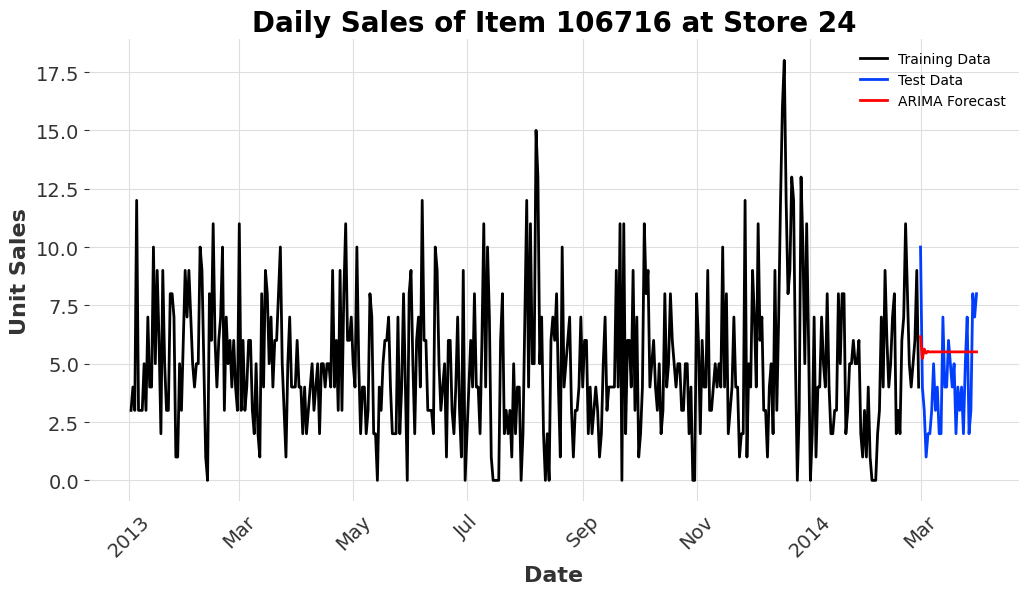

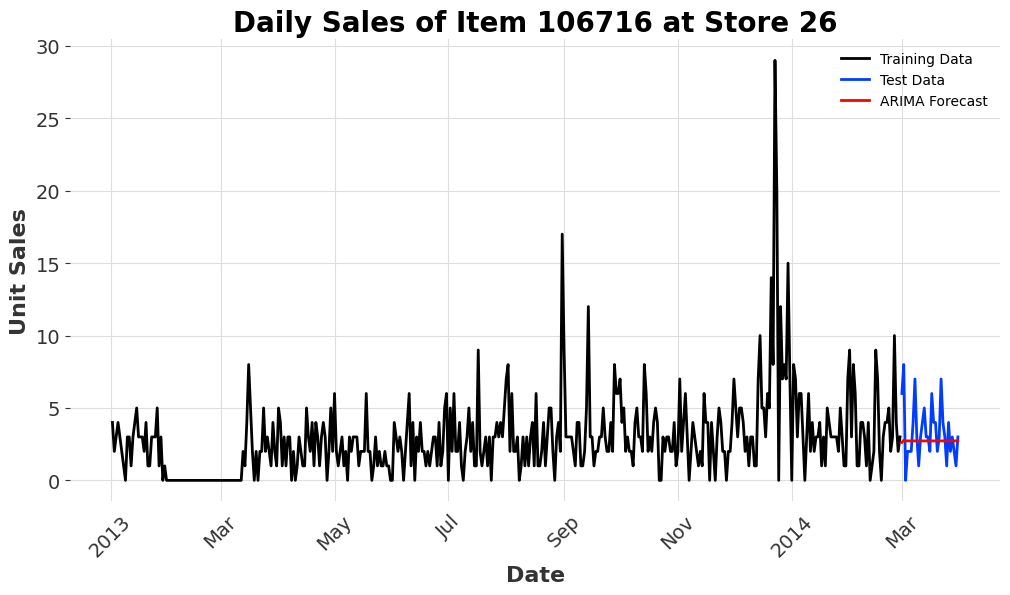

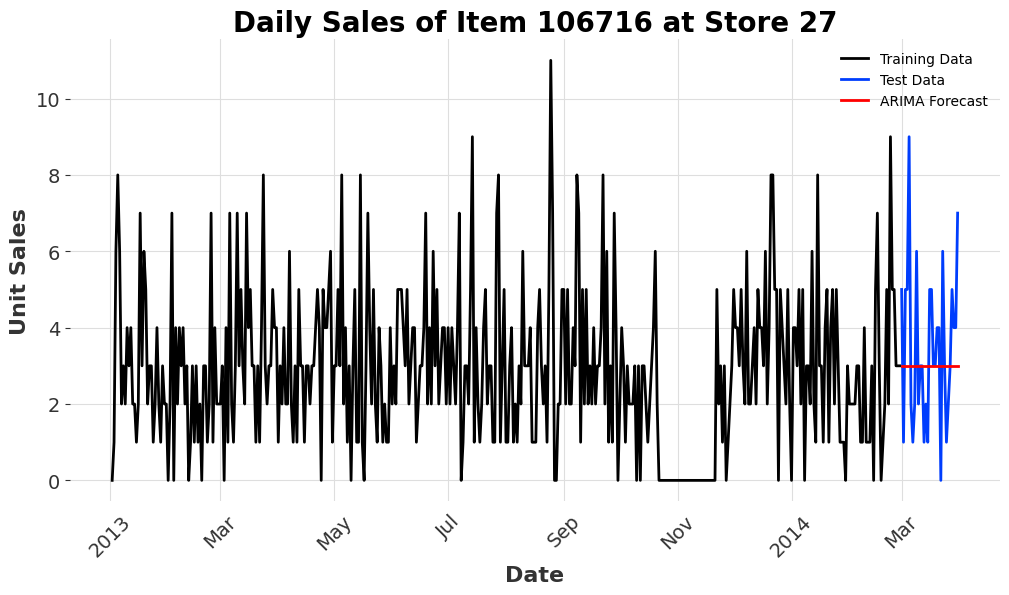

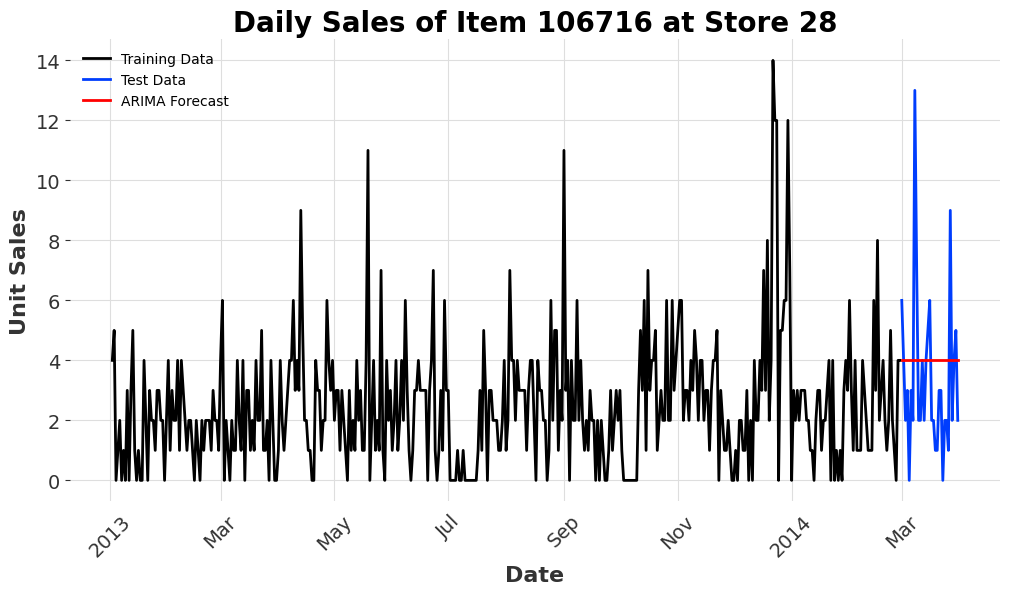

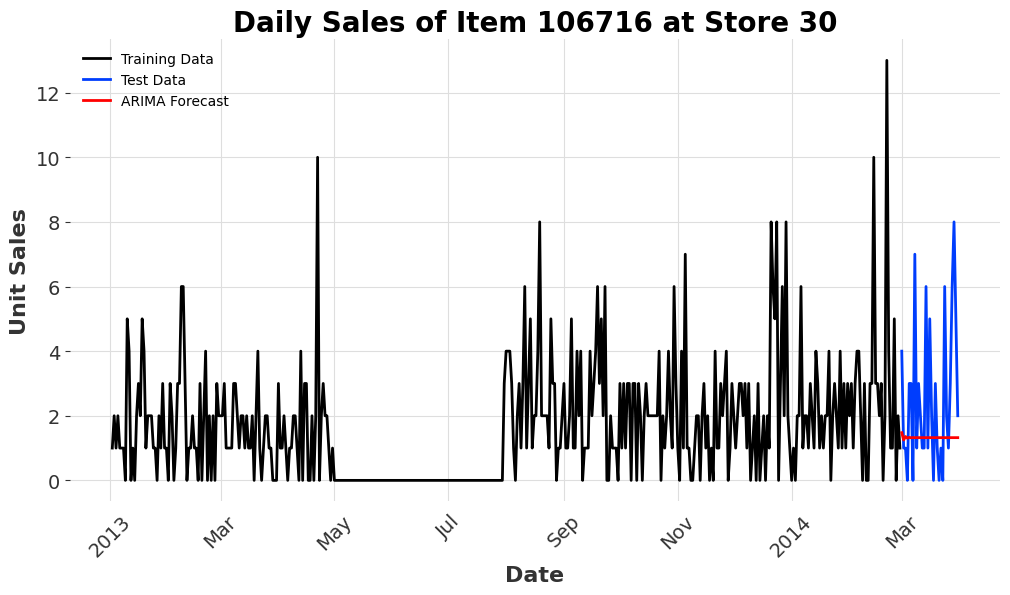

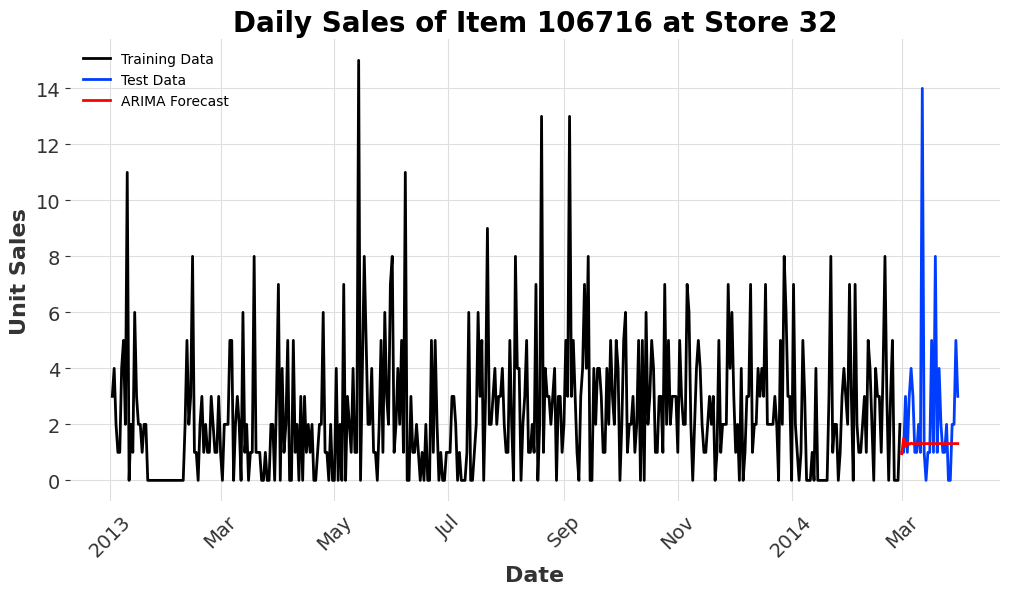

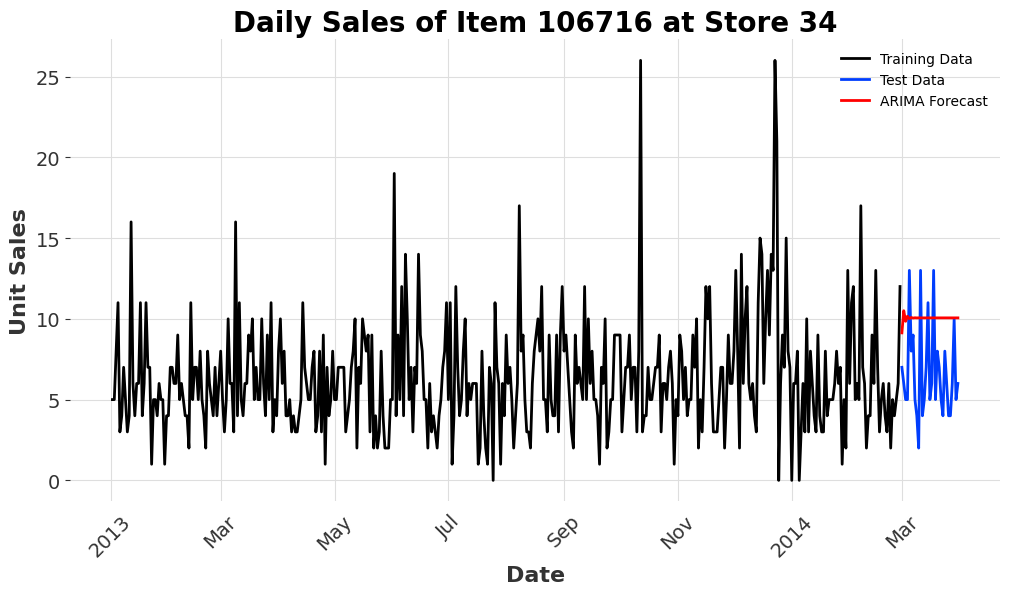

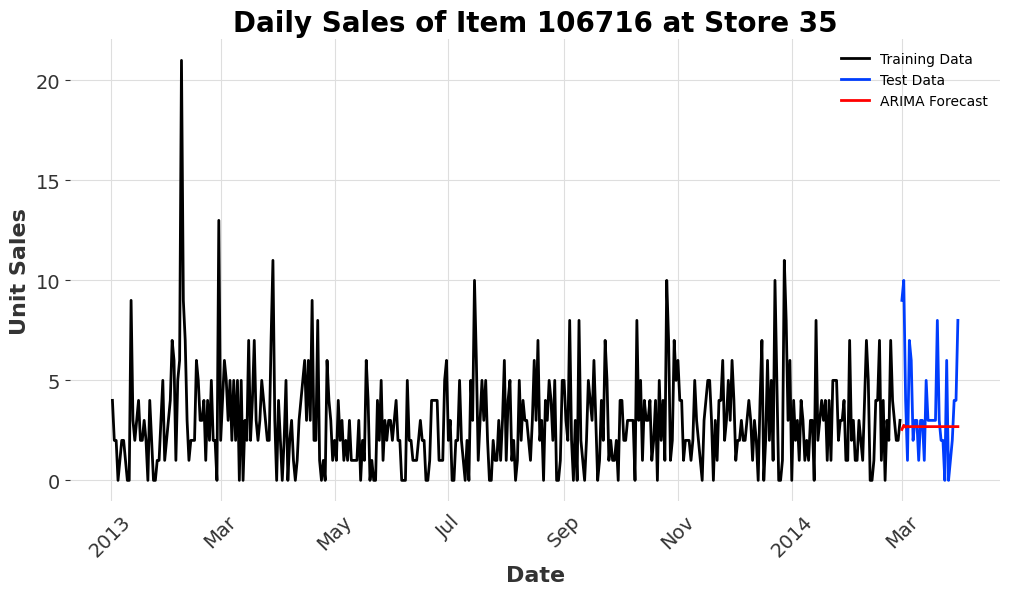

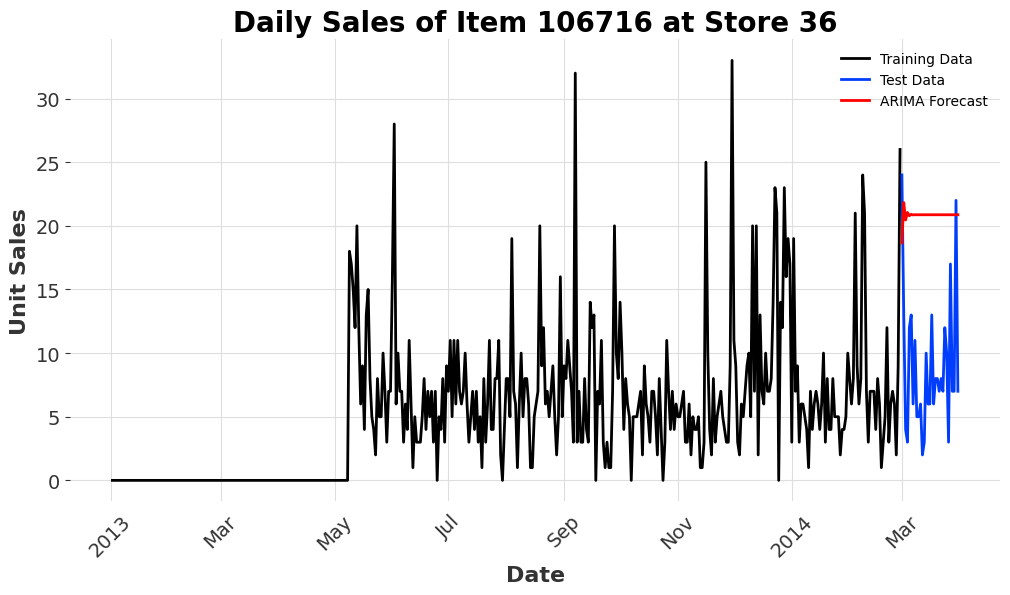

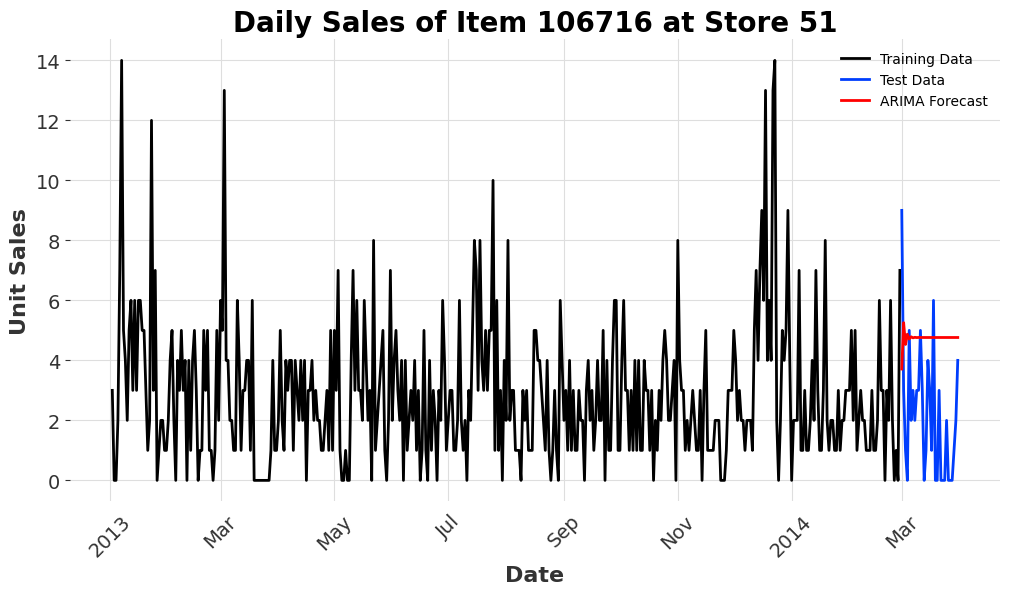

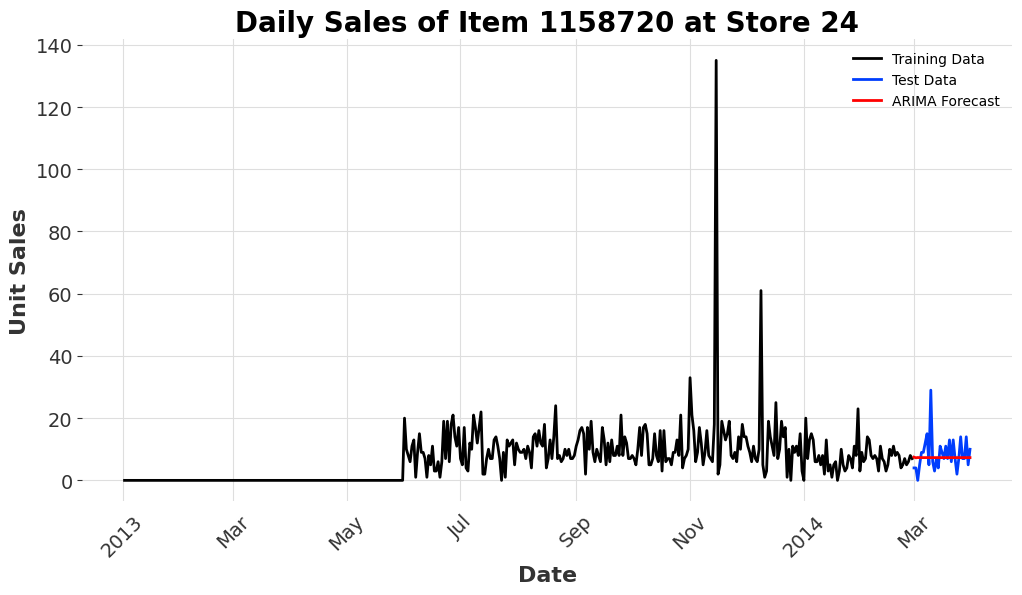

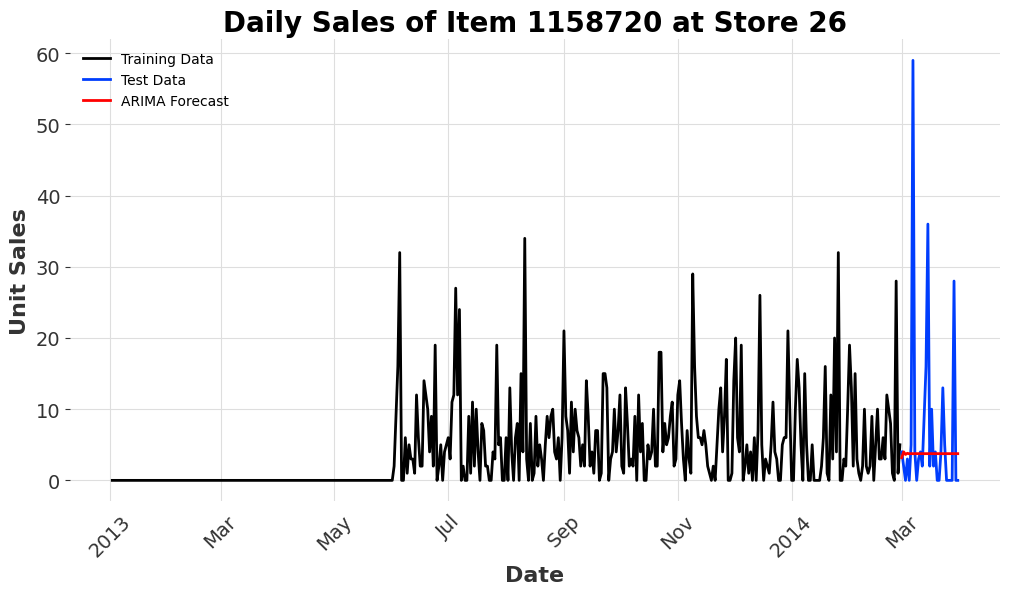

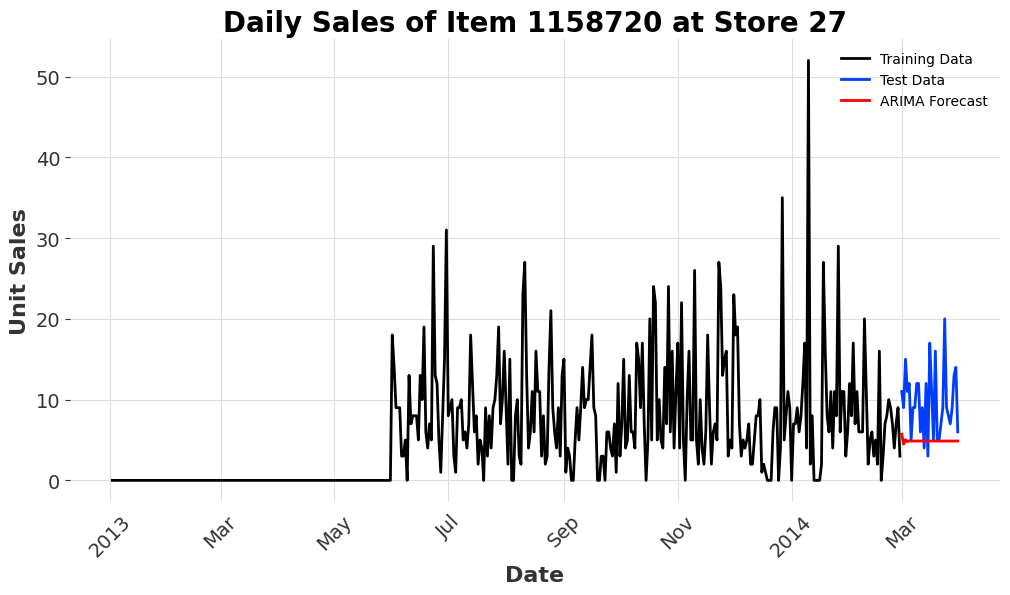

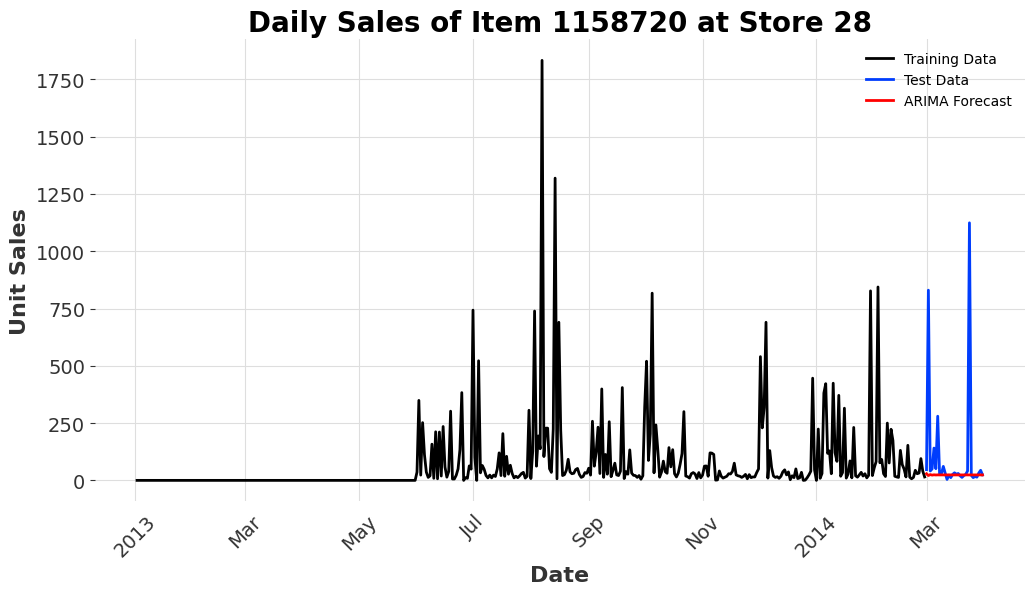

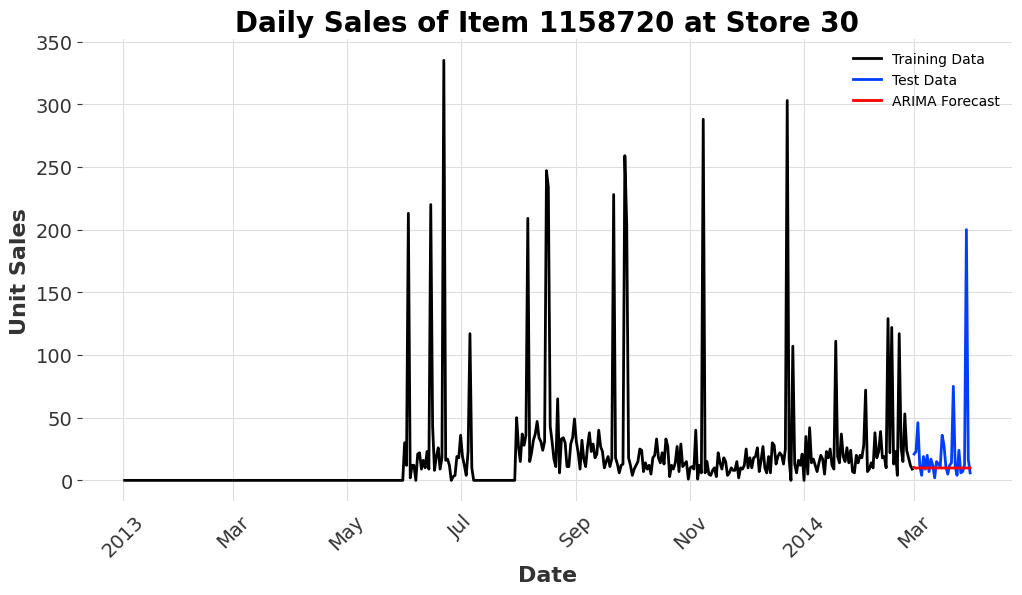

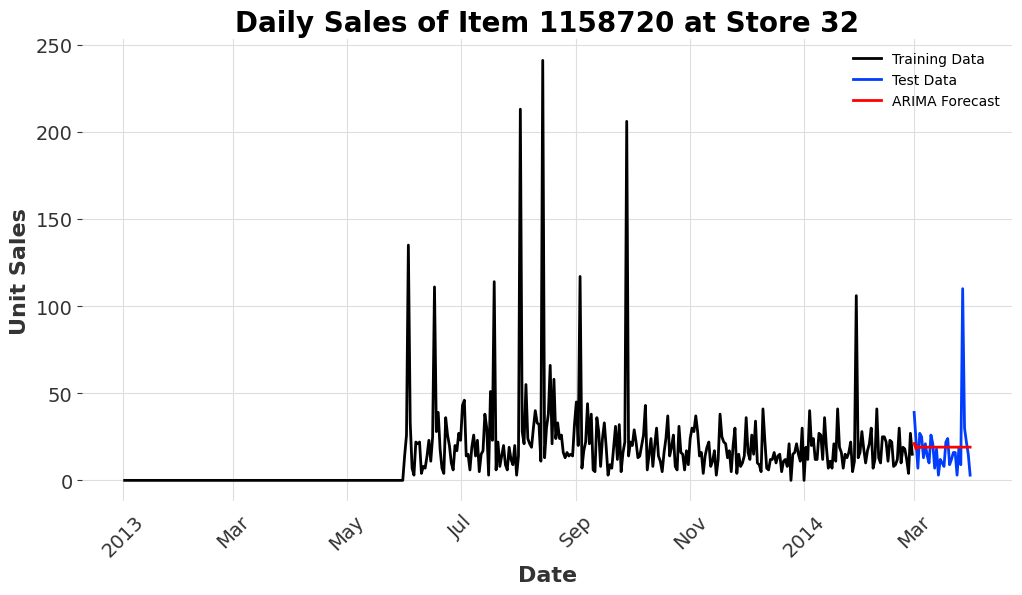

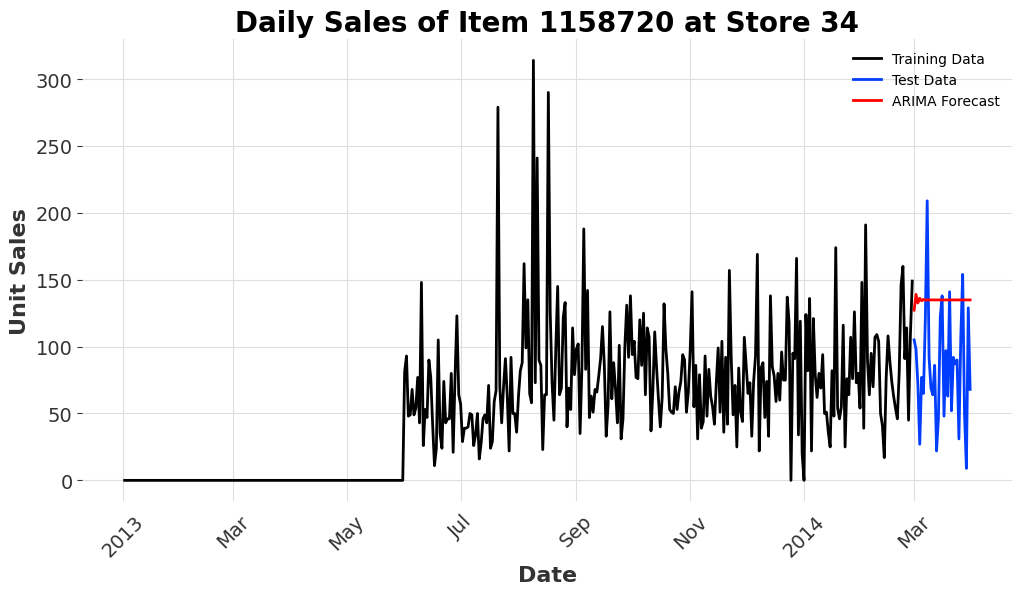

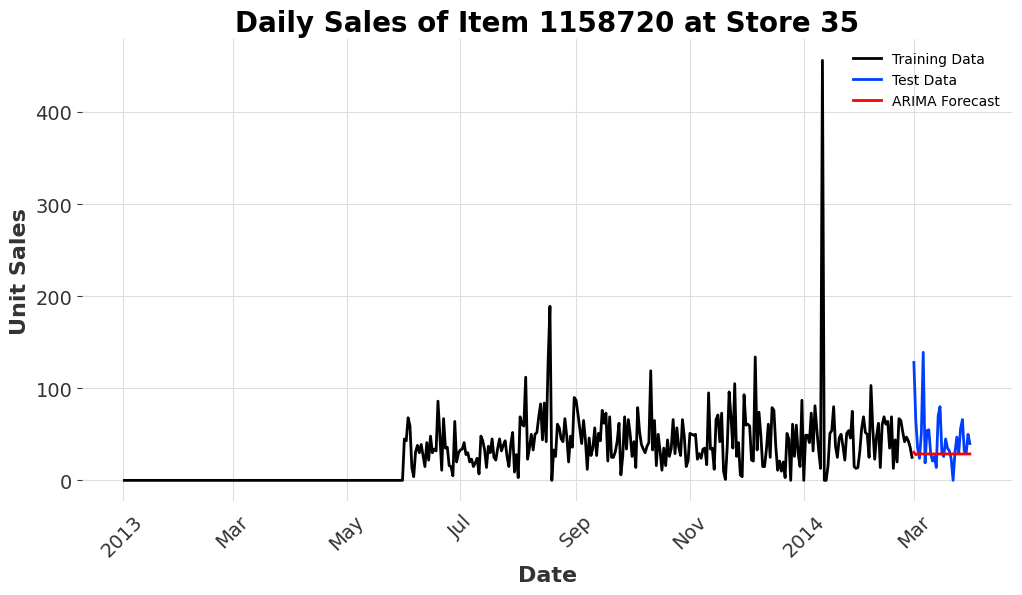

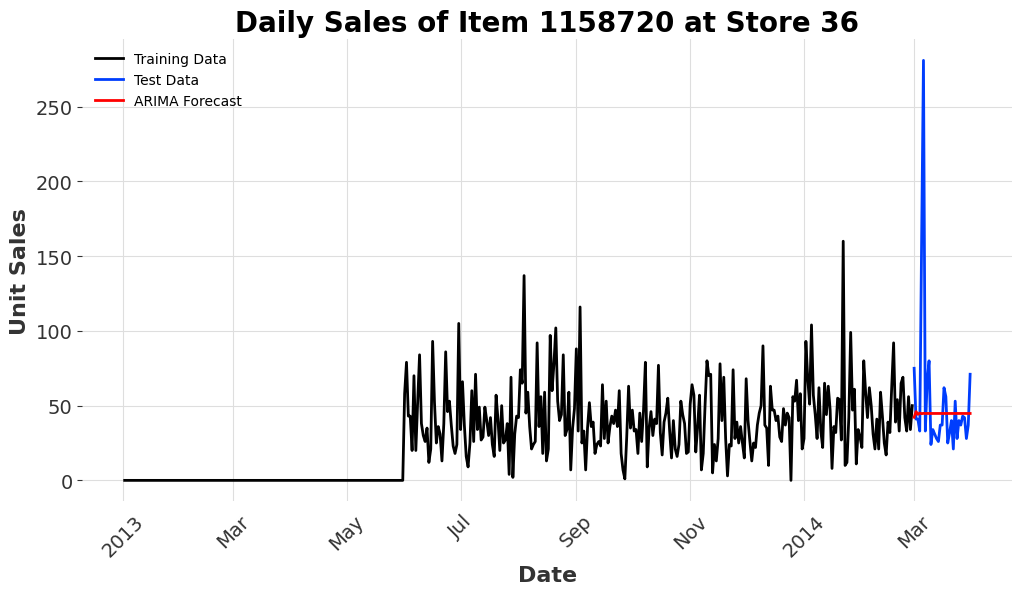

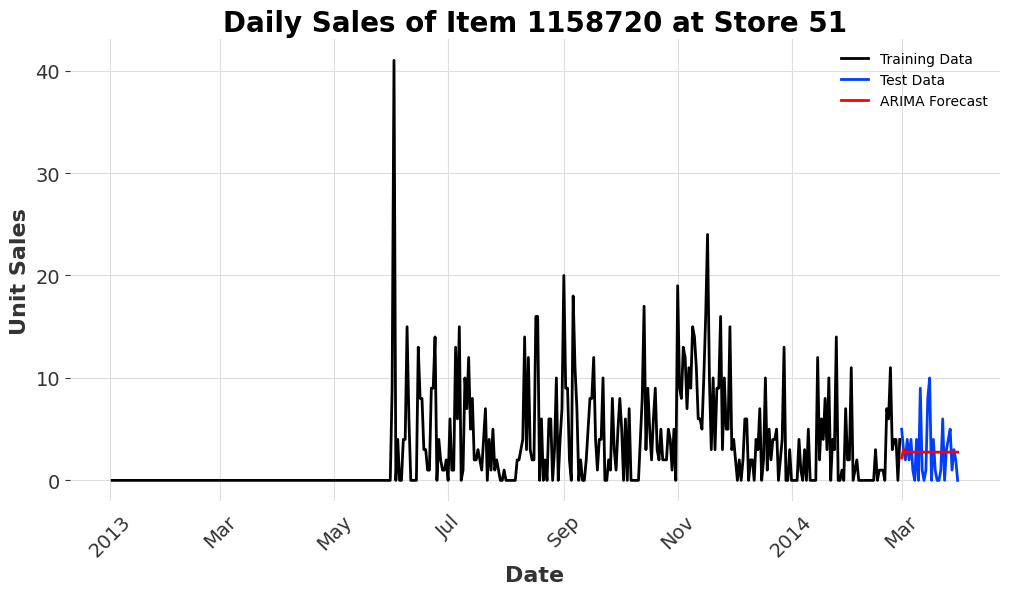

MAD: [0.5173342794613157, 0.4377911444029153, 0.4672883658000616, 0.634613492979011, 0.7192669138835825, 0.6720318447790272, 0.6060103540320537, 0.5270451640797326, 1.4294345109922255, 1.43990487783028, 0.4300533757904685, 0.9255079441466445, 0.5129075061579622, 0.8156898447487559, 0.672565179301824, 0.5370775566173154, 0.6661266137217762, 0.46571119468014216, 0.4576525741233381, 0.8142990523136188]
Bias: [1.2957227761110341, -0.6323963157908365, -0.45161290322580633, 0.6451612903225797, -1.2223558199437499, -1.1135714772578837, 3.394064870189801, -0.9605357965639463, 12.078169761026585, 2.610685152934745, -1.13189113893408, -3.194830534412694, -4.786590398540683, -77.80644455232988, -12.644403014447168, -0.049004265678121786, 49.918189347053804, -15.82779355053603, -8.256844575010234, 0.03563234672749104]
RMSE: [2.465085288356794, 1.9805646208053773, 2.0635078182863835, 2.735666457692153, 2.548821812237907, 2.939890591373617, 4.409683792027555, 2.7270372389303836, 13.193318804124134, 

In [59]:
import os
from tempfile import TemporaryDirectory

# Loop over each product-store pair
rmad_values = []
bias_values = []
rmse_values = []
plot_paths = []
plot_count = 0

with mlflow.start_run(run_name="arima_run(1,1,0)"):
    run_id = mlflow.active_run().info.run_id
    print(f"Run ID: {run_id}")
    # Log ARIMA parameters only once for the whole run
    mlflow.log_param("p", 1)
    mlflow.log_param("d", 1)
    mlflow.log_param("q", 0)

    for (item_nbr, store_nbr), group in df_filled.groupby(['item_nbr', 'store_nbr']):
        group = group.groupby(['date']).sum()['unit_sales'].reset_index()
        train_series = TimeSeries.from_dataframe(group[group['date'] < split_date], value_cols='unit_sales', time_col='date', fill_missing_dates=True, freq='D')
        train_series += 1e-5  # Add a small constant to make all values positive
        test_series = TimeSeries.from_dataframe(group[group['date'] >= split_date], value_cols='unit_sales', time_col='date', fill_missing_dates=True, freq='D')
        test_series += 1e-5  # Add a small constant to make all values positive

        # Initialize ARIMA model with (p, d, q) parameters
        arima_model = ARIMA(p=1, d=1, q=0)  # ARIMA(p, d, q)

        # Fit the ARIMA model on the training data
        arima_model.fit(train_series)

        # Forecast the next values (the same length as the test set)
        arima_forecast = arima_model.predict(len(test_series))

        # Save and log model as an artifact
        with TemporaryDirectory() as tmp_dir:
            model_path = os.path.join(tmp_dir, f"arima_model_store_{store_nbr}_item_{item_nbr}.pkl")
            arima_model.save(model_path)  # Save ARIMA model
            mlflow.log_artifact(model_path, artifact_path=f"models/arima_store_{store_nbr}_item_{item_nbr}")

        # Optional: plot forecast vs actual data for a subset
        if plot_count < 20:
            plt.figure(figsize=(12, 6))  # Adjust the figure size (width, height)
            train_series.plot(label='Training Data')
            test_series.plot(label='Test Data')
            arima_forecast.plot(label='ARIMA Forecast', color='red')
            plt.title(f'Daily Sales of Item {item_nbr} at Store {store_nbr}', fontsize=20, fontweight='bold')
            plt.xlabel('Date', fontsize=16)
            plt.ylabel('Unit Sales', fontsize=16)
            plt.xticks(fontsize=14, rotation=45)
            plt.yticks(fontsize=14)
            plt.legend()
            file_path = f'ARIMA_forecast_store_{store_nbr}_item_{item_nbr}.png'
            plt.savefig(file_path)  # Saves the plot as a PNG file
            plt.show()
            plot_paths.append(file_path)
            plot_count += 1

        # Calculate metrics
        bias_value = (arima_forecast.values() - test_series.values()).mean()
        bias_values.append(bias_value)
        rmse_value = rmse(test_series, arima_forecast)
        rmse_values.append(rmse_value)
        mae_value = mae(test_series, arima_forecast)
        mean_actual = test_series.values().mean()
        rmad_value = mae_value / mean_actual
        rmad_values.append(rmad_value)

    # Log average metrics across all models
    mlflow.log_metric("Average_rMAD", sum(rmad_values) / len(rmad_values))
    mlflow.log_metric("Average_Bias", sum(bias_values) / len(bias_values))
    mlflow.log_metric("Average_RMSE", sum(rmse_values) / len(rmse_values))

    # Log plots
    for plot_path in plot_paths:
        mlflow.log_artifact(plot_path, artifact_path="plots")

        print("MAD:", rmad_values)
        print("Bias:", bias_values)
        print("RMSE:", rmse_values)



From analyzing the **MLflow experiment tracking results**, we can derive insights about the **ARIMA models** that were tested for demand forecasting.

### **Key Observations from MLflow:**
1. **Tested ARIMA Configurations:**
   - The following ARIMA models were tested:  
     - **ARIMA(1,1,0)**
     - **ARIMA(2,0,0)**
     - **ARIMA(1,0,0)**
     - **ARIMA(2,1,0)**
   - These configurations suggest that **both differencing (`d`) and autoregressive (`p`) terms were experimented with**.

2. **Parallel Coordinates Plot Insights:**
   - The plot shows the relationships between **p (autoregressive term), d (differencing term), q (moving average term), and performance metrics (Bias, RMSE, rMAD)**.
   - **Key trends:**
     - **RMSE (Root Mean Squared Error):** The best-performing models (lower RMSE) had `d=0` or `d=1`, with `p` mostly between 1 and 2.
     - **Bias:** Models with `p=2, d=1, q=0` showed more significant bias.
     - **rMAD (Relative Mean Absolute Deviation):** The lowest values were associated with **ARIMA(1,0,0) and ARIMA(2,0,0)**.

3. **Model Comparison:**
   - The **best models in terms of RMSE and rMAD** appear to be **ARIMA(1,0,0) and ARIMA(2,0,0)**.
   - **ARIMA(2,1,0)** had **higher RMSE**, which suggests that applying first-order differencing (`d=1`) might not be necessary for this dataset.
   - **ARIMA(1,1,0) and ARIMA(2,1,0) have higher bias**, meaning they may be systematically over- or under-predicting.

### **Conclusion and Next Steps:**
✅ **The best ARIMA models seem to be ARIMA(1,0,0) and ARIMA(2,0,0).**  
❌ **ARIMA(2,1,0) and ARIMA(1,1,0) had higher errors and bias, meaning differencing (`d=1`) might not be required.**  

### **Next Actions:**
 **Compare with XGBoost:** Since there are XGBoost models in the same MLflow experiment, compare them with ARIMA in terms of RMSE and Bias.


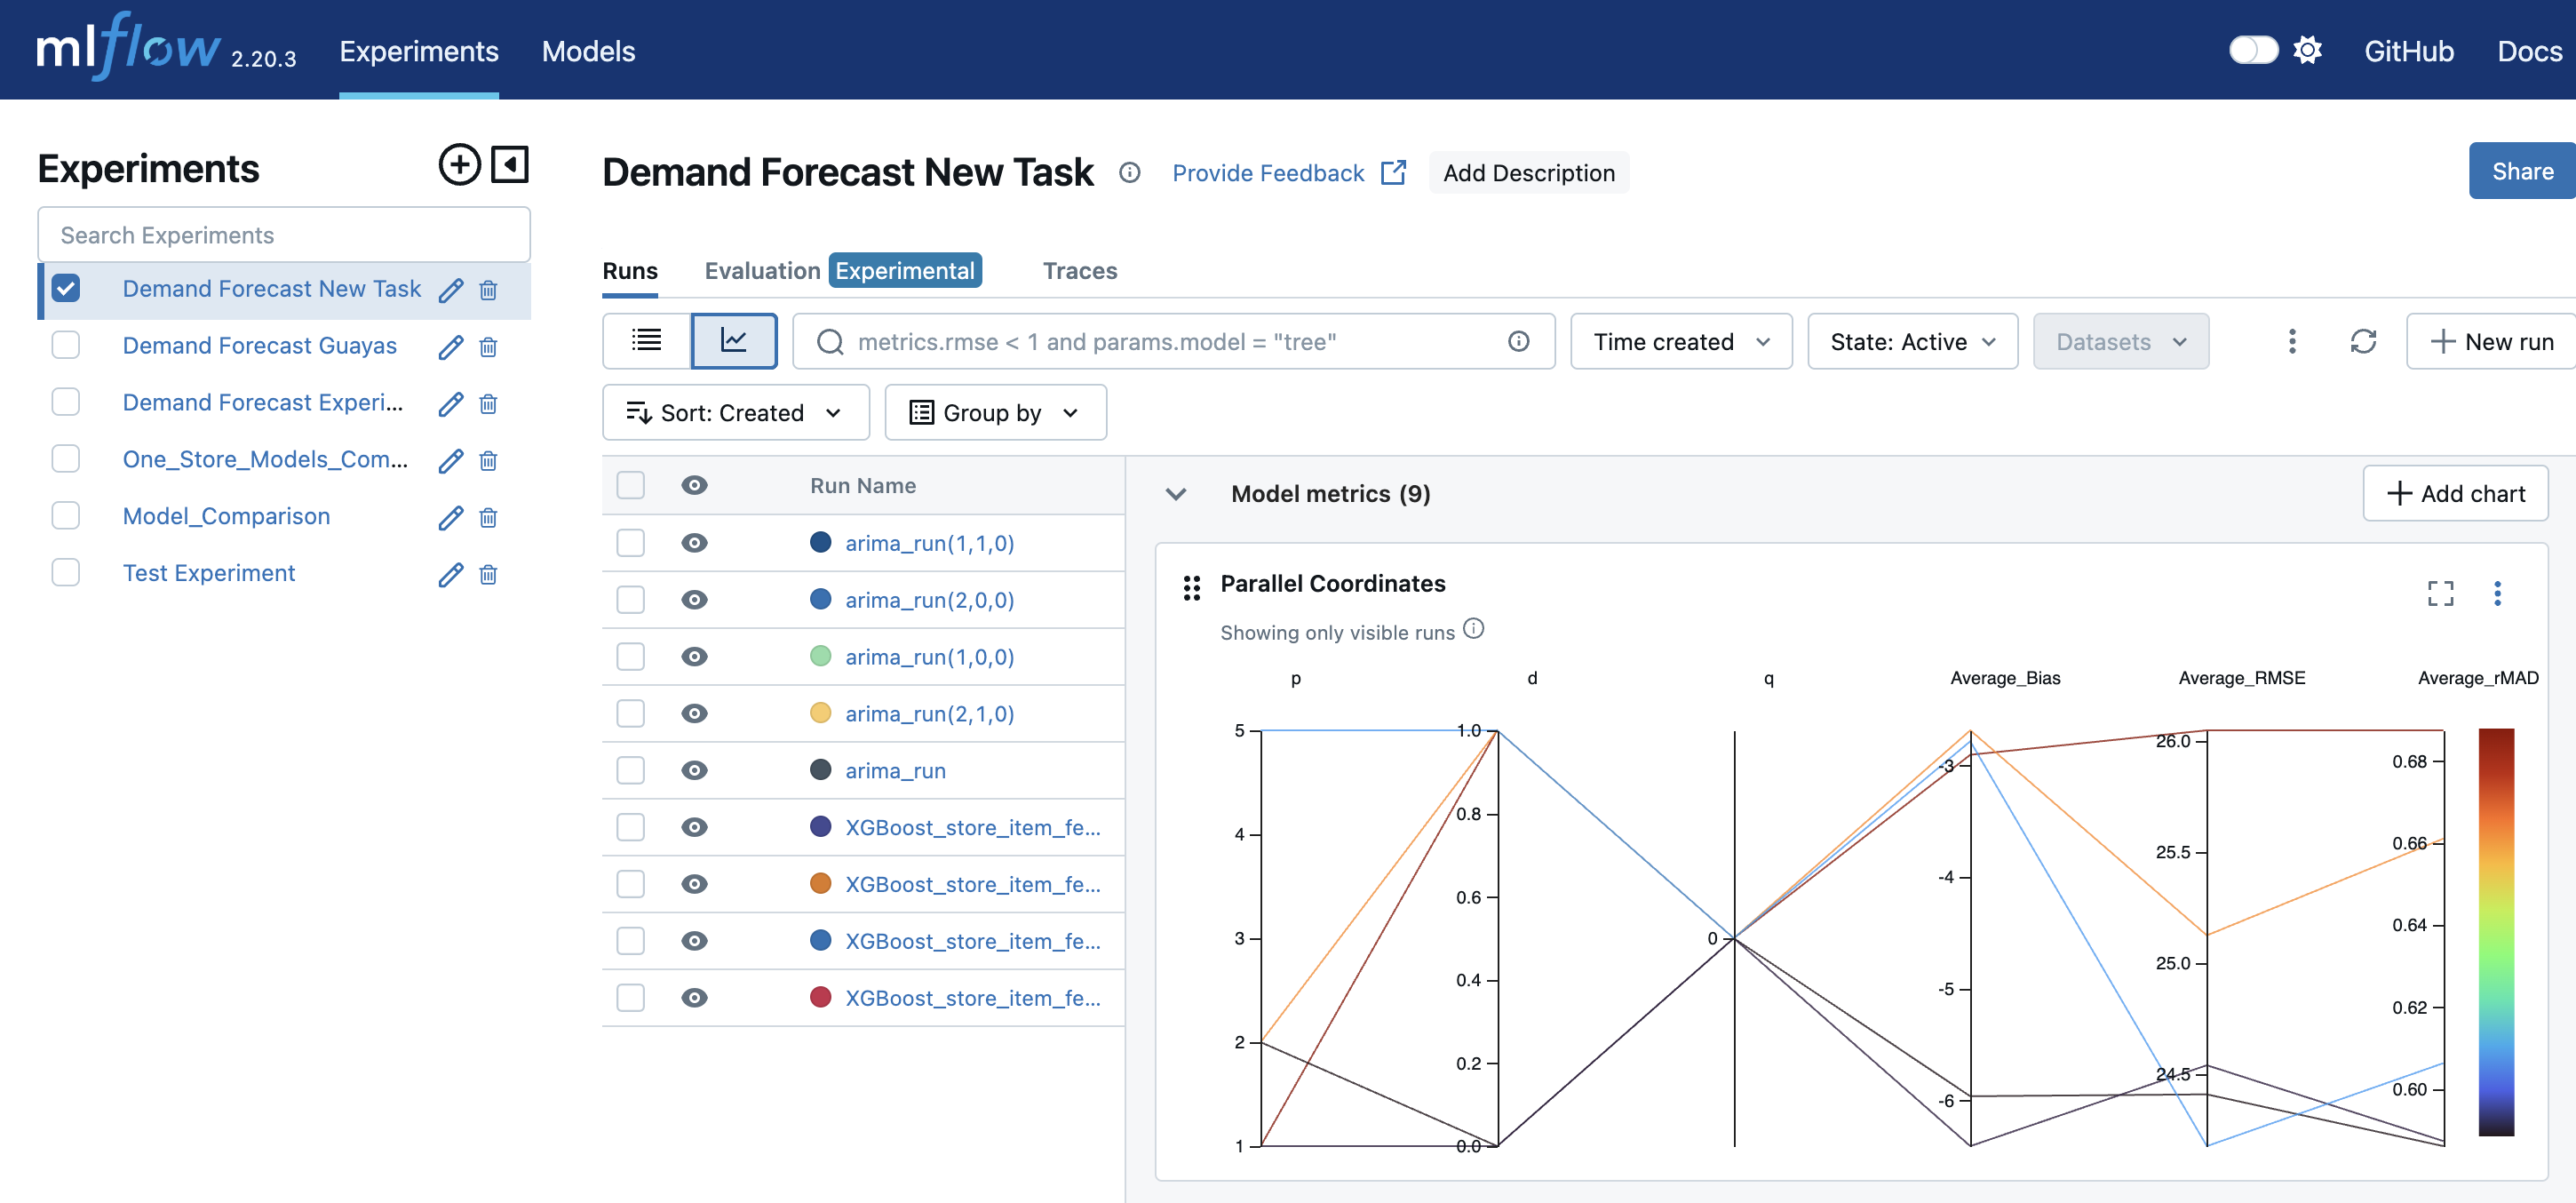

### **Business-Oriented Analysis of ARIMA Metrics**  

Now, we analyze which metric is more important depending on different **business tasks**. The provided metrics are:

1. **Root Mean Squared Error (RMSE)**
2. **Relative Mean Absolute Deviation (rMAD)**
3. **Bias (Mean Forecast Error)**

Each metric impacts decision-making differently, depending on the business objectives.

---

## **1. Understanding Each Metric for Business Use Cases**
| **Metric**        | **What It Measures** | **Business Impact** | **Best for These Business Tasks** |
|-------------------|---------------------|----------------------|-----------------------------|
| **RMSE (Root Mean Squared Error)**  | Measures absolute forecast accuracy (penalizes large errors more) | Lower RMSE = More accurate demand forecast (better overall accuracy) | ✅ **Inventory Planning** (avoiding stockouts/overstocking)<br>✅ **Financial Forecasting** (minimizing overall forecast error)<br>✅ **Operational Demand Prediction** (day-to-day business needs) |
| **rMAD (Relative Mean Absolute Deviation)** | Measures forecast error as a percentage of actual demand | Lower rMAD = More stable and proportional error | ✅ **Seasonal Demand Forecasting** (relative accuracy matters more than absolute numbers)<br>✅ **Promotion Impact Analysis** (comparing across products/regions) |
| **Bias (Mean Forecast Error)** | Measures systematic over/under-prediction (negative bias = underprediction, positive bias = overprediction) | Bias close to **zero** means balanced predictions (no systematic mistake) | ✅ **Long-Term Strategic Planning** (avoiding consistent over/under-forecasting)<br>✅ **Budget Allocation & Pricing Strategies** |

---

## **2. Business-Oriented Comparison of the Two Models**
| **Metric**          | **ARIMA(1,0,0) Value** | **ARIMA(2,0,0) Value** | **Which Model is Better?** | **Business Scenario Best Fit** |
|-------------------|-------------------|-------------------|----------------|------------------------------|
| **RMSE** (↓ better) | **24.5387** | **24.4075** ✅ (slightly better) | **ARIMA(2,0,0)** | **If your business needs the most accurate demand forecast for operations.** |
| **rMAD** (↓ better) | **0.5873** | **0.5860** ✅ (slightly better) | **ARIMA(2,0,0)** | **If you need reliable percentage-based forecast accuracy (for products with highly variable demand).** |
| **Bias** (≈ 0 better) | **-6.41** ✅ (less bias) | **-5.96** (worse bias) | **ARIMA(1,0,0)** | **If avoiding systematic forecast error (e.g., long-term financial planning) is important.** |

---

## **3. Which Model to Use for Different Business Scenarios?**

| **Business Task** | **Best Metric to Optimize** | **Best Model** |
|----------------------|-------------------------|--------------|
| **Short-Term Demand Forecasting** (daily/weekly sales predictions) | **RMSE** (minimizes absolute errors for better accuracy) | ✅ **ARIMA(2,0,0)** |
| **Supply Chain & Inventory Planning** | **RMSE + Bias** (accurate and unbiased forecasts prevent stock issues) | ✅ **ARIMA(1,0,0) (better bias control)** |
| **Promotional Forecasting** (impact of discounts & campaigns) | **rMAD** (relative accuracy matters more than absolute numbers) | ✅ **ARIMA(2,0,0) (lower rMAD)** |
| **Seasonal Demand Forecasting** | **rMAD** (capturing proportional demand shifts) | ✅ **ARIMA(2,0,0) (more stable relative error)** |
| **Financial Forecasting & Budgeting** | **Bias** (avoiding systematic over/under-forecasting) | ✅ **ARIMA(1,0,0) (less biased)** |
| **Pricing & Revenue Management** | **Bias + RMSE** (minimizing errors while keeping forecasts balanced) | ✅ **ARIMA(1,0,0) (better bias control)** |
| **Strategic Long-Term Planning** | **Bias** (preventing long-term miscalculations) | ✅ **ARIMA(1,0,0) (less bias)** |

---

## **4. Final Business Recommendation**
- **For operational forecasting (daily/weekly demand, supply chain decisions):**  
  📌 **Use ARIMA(2,0,0)** (better RMSE & rMAD, meaning lower error rates).
  
- **For financial planning, budgeting, and strategic decision-making:**  
  📌 **Use ARIMA(1,0,0)** (better bias control, preventing systematic forecasting mistakes).

Would you like me to generate **visualizations** comparing the forecasts of these models in a real-world dataset? 🚀